## import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.metrics import classification_report, fbeta_score

## read the data 

In [2]:
df = pd.read_csv('bank.csv',delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### data size

In [4]:
df.shape

(4521, 17)

### null data

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### value counts of some columns

In [6]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [7]:
df['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [8]:
df['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [9]:
df['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

In [10]:
df['balance'].value_counts()

balance
0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: count, Length: 2353, dtype: int64

In [11]:
df['housing'].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

In [12]:
df['loan'].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

In [13]:
df['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [14]:
df['duration'].value_counts()

duration
123     27
104     25
119     23
77      22
58      22
        ..
762      1
602      1
923      1
1032     1
660      1
Name: count, Length: 875, dtype: int64

In [15]:
df['pdays'].value_counts()

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: count, Length: 292, dtype: int64

In [16]:
df['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [17]:
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [18]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### comparing features to the target

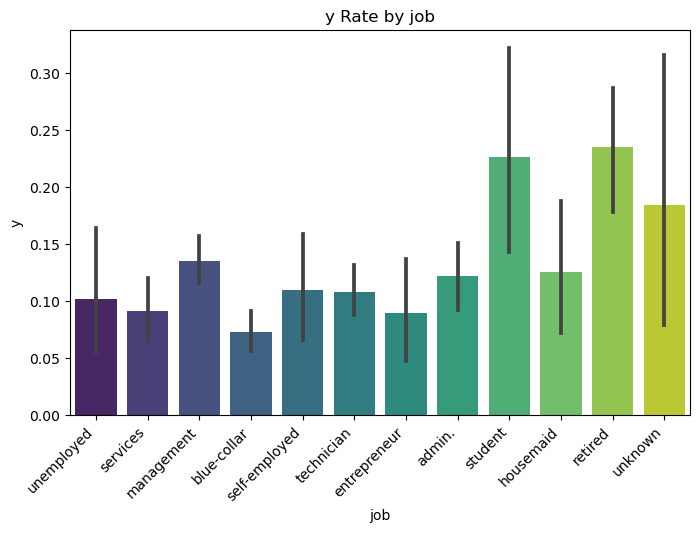

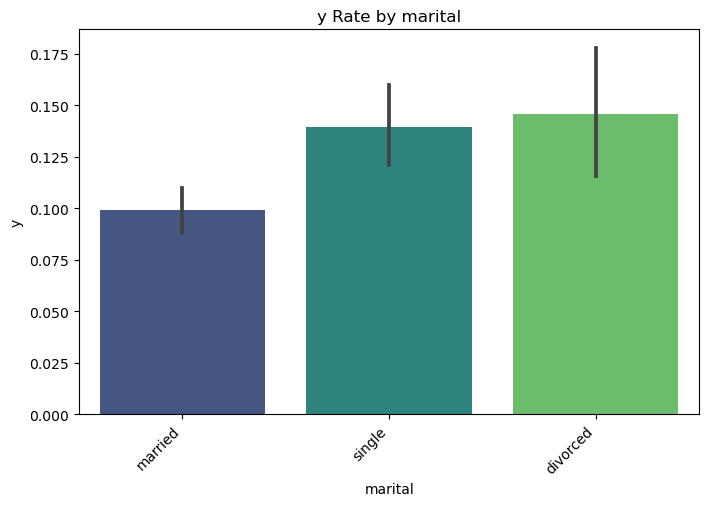

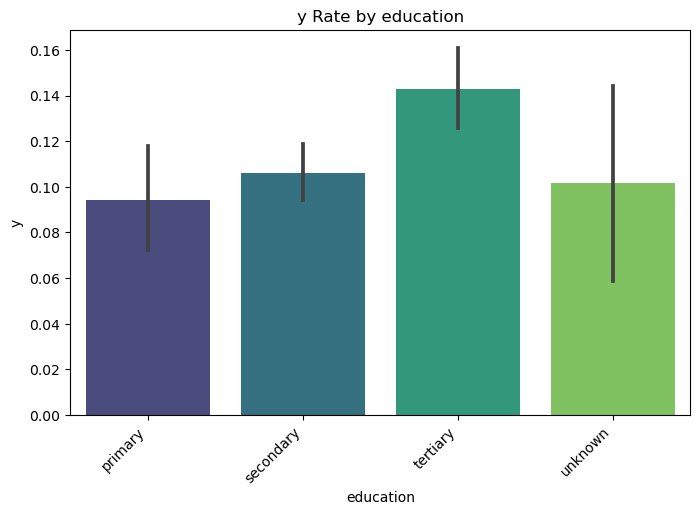

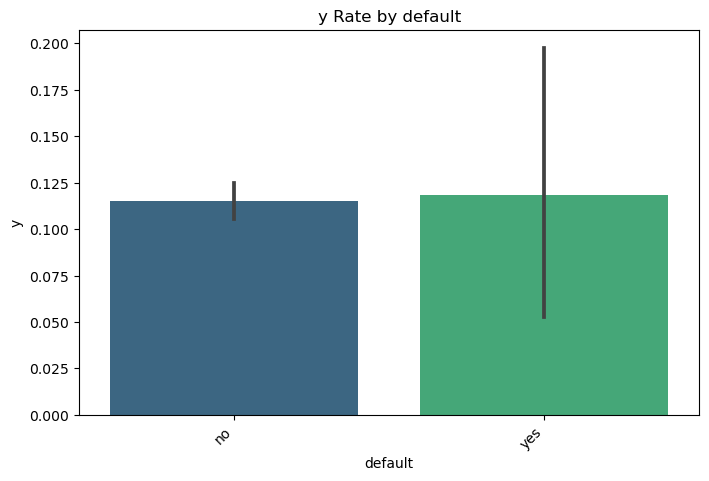

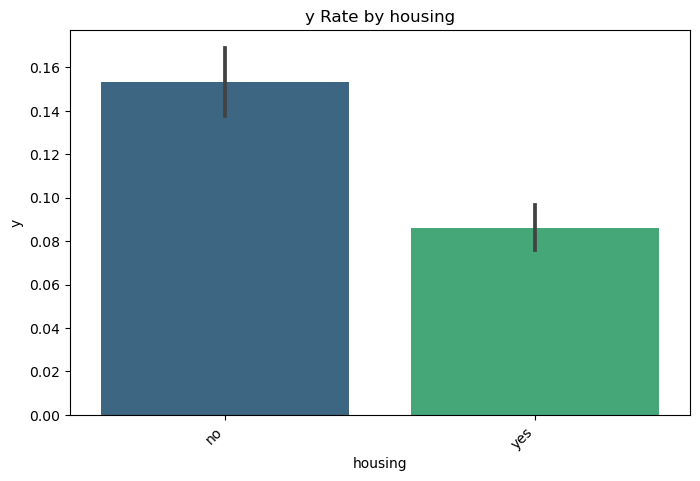

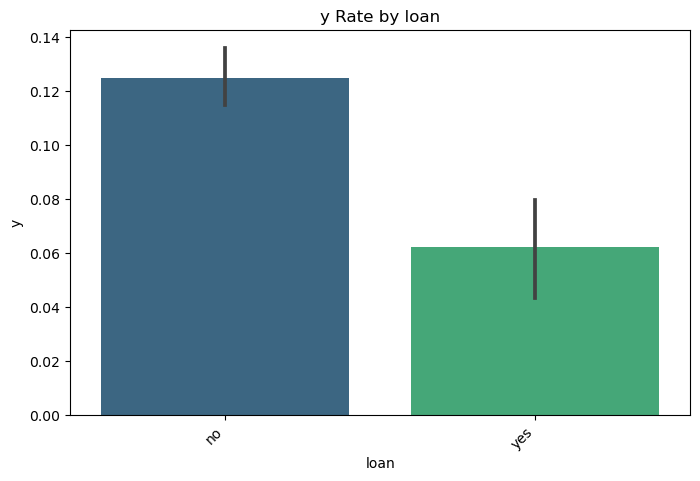

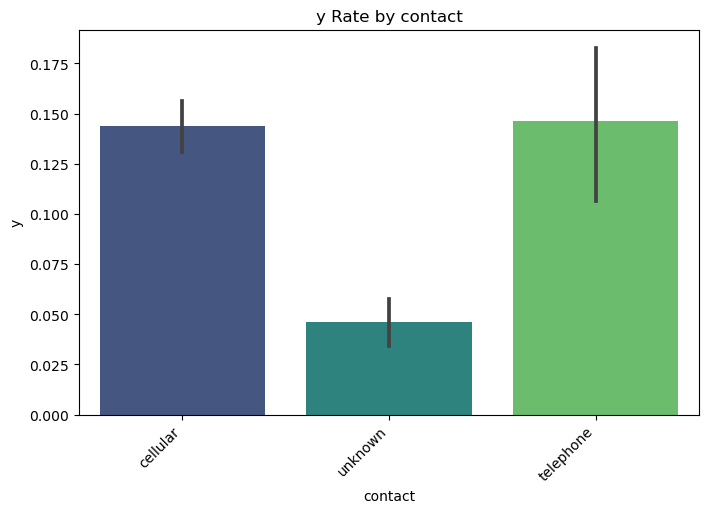

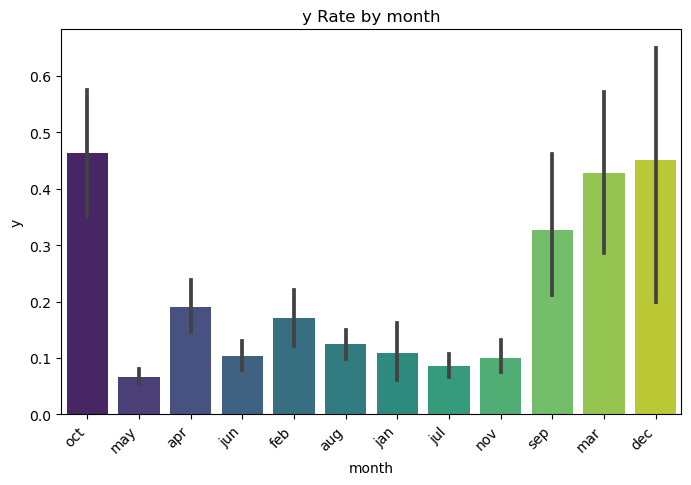

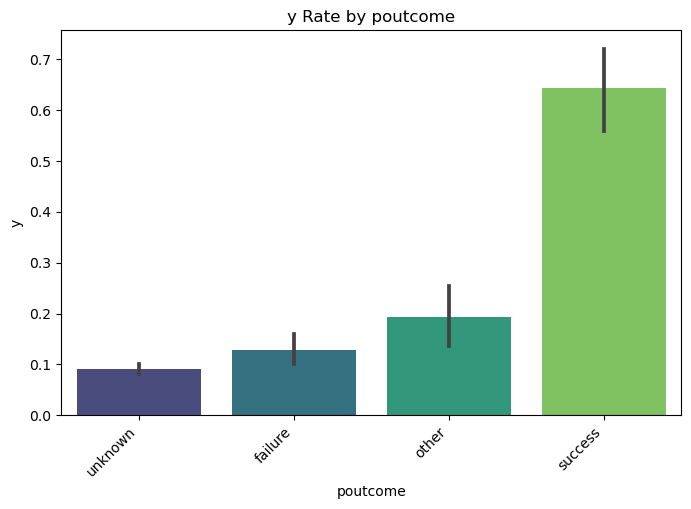

In [19]:
for column in df.columns:
    if column not in ['age', 'balance', 'day', 'duration', 'campaign','pdays','previous','y']:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=column, y='y', data=df, palette='viridis')
        plt.title(f'y Rate by {column}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

### discovering patterns and trends in data

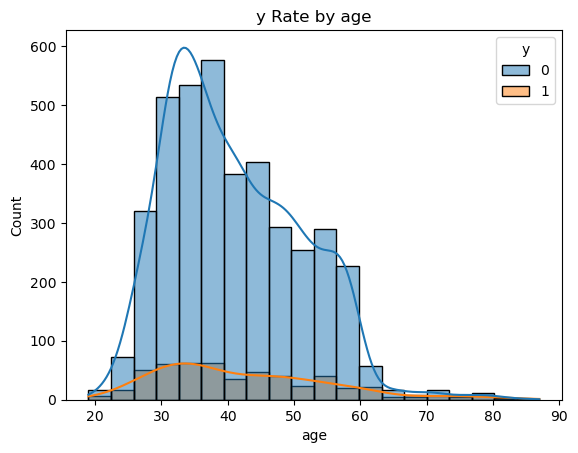

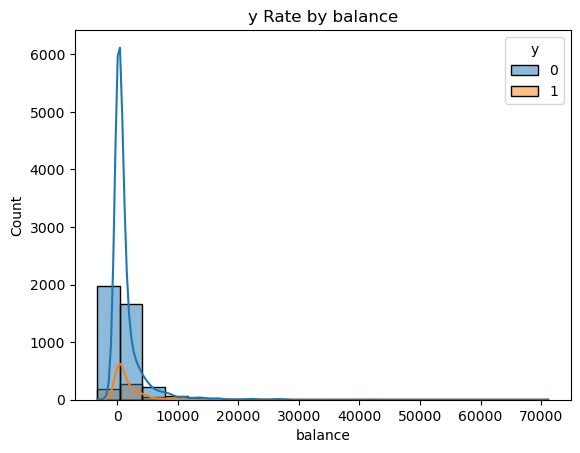

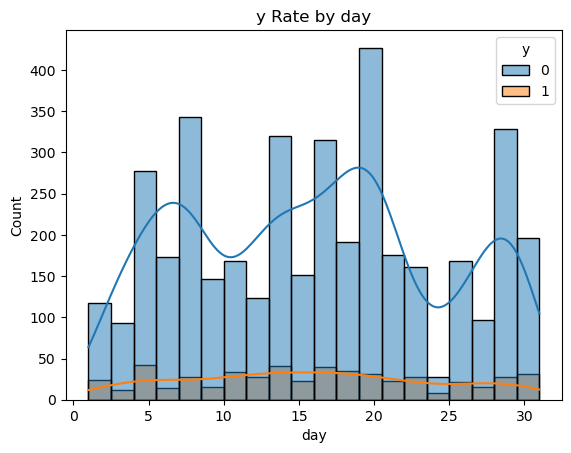

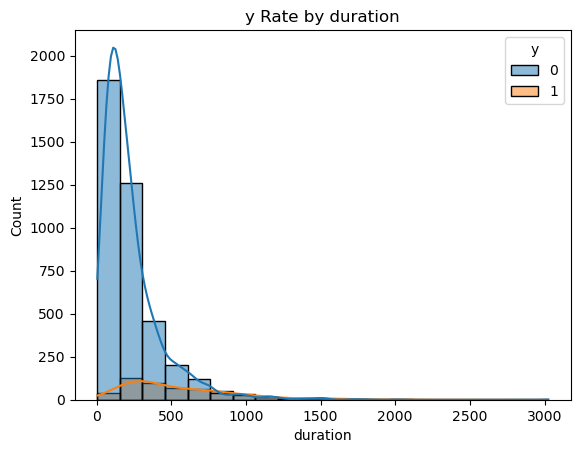

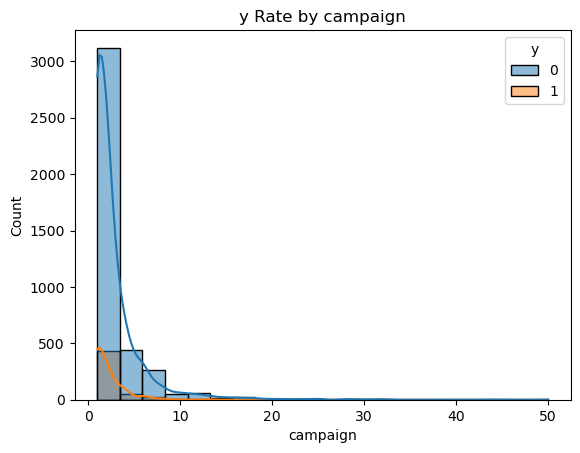

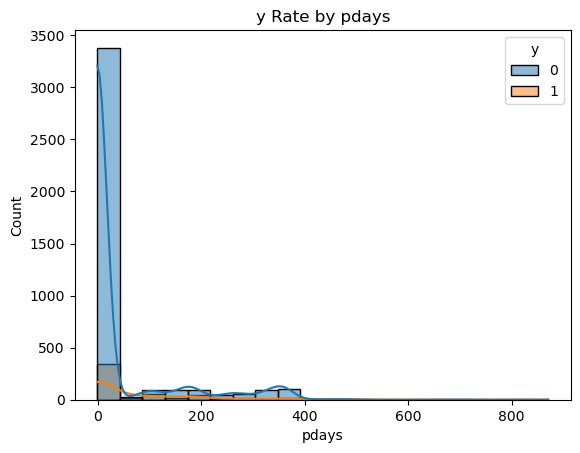

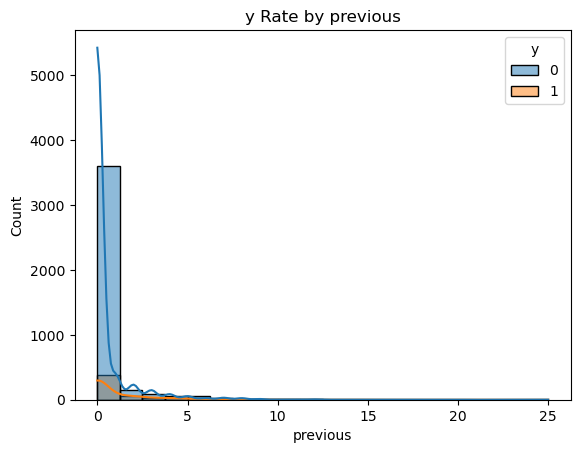

In [20]:
for column in df.columns:
    if column in ['age', 'balance', 'day', 'duration', 'campaign','pdays','previous']:
        sns.histplot(x=column, hue='y', data=df, bins=20, kde=True)
        plt.title(f'y Rate by {column}')
        plt.show()

### drpoing unnecessary columns

In [21]:
df = df[['job','marital','housing','loan','poutcome','contact','y']]

## encoding categorical features

In [22]:
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})

df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'poutcome'], drop_first=True)

## separate features and target variable

In [23]:
X = df.drop('y', axis=1)
y = df['y']

In [24]:
X.shape

(4521, 20)

In [25]:
y.shape

(4521,)

### split the data into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### initialize and fit the decision tree classifier

In [27]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### printing the feature importances

In [28]:
print("Feature Importances:")
print(dict(zip(X.columns, clf.feature_importances_)))

Feature Importances:
{'housing': 0.058858485307130885, 'loan': 0.07395178501428262, 'job_blue-collar': 0.033268494620926535, 'job_entrepreneur': 0.0156488752494671, 'job_housemaid': 0.0188433346182606, 'job_management': 0.03457821717236807, 'job_retired': 0.02990664293683602, 'job_self-employed': 0.021416140023117508, 'job_services': 0.0241063847588016, 'job_student': 0.011607694294748878, 'job_technician': 0.034337386372417816, 'job_unemployed': 0.018079148651032245, 'job_unknown': 0.00799604073308591, 'marital_married': 0.054617924878264106, 'marital_single': 0.05539560463217292, 'contact_telephone': 0.05072437255813814, 'contact_unknown': 0.04395214390782571, 'poutcome_other': 0.048204437904345324, 'poutcome_success': 0.3221295190854308, 'poutcome_unknown': 0.04237736728134726}


## evaluate the model on the test set

In [29]:
accuracy = clf.score(X_test, y_test)
print(f"\nAccuracy on Test Set: {accuracy:.2f}")


Accuracy on Test Set: 0.89


### visualize the decision tree

In [30]:
tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- job_retired <= 0.50
|   |   |   |--- marital_married <= 0.50
|   |   |   |   |--- housing <= 0.50
|   |   |   |   |   |--- job_student <= 0.50
|   |   |   |   |   |   |--- poutcome_other <= 0.50
|   |   |   |   |   |   |   |--- job_self-employed <= 0.50
|   |   |   |   |   |   |   |   |--- job_blue-collar <= 0.50
|   |   |   |   |   |   |   |   |   |--- loan <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- contact_telephone <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- contact_telephone >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- loan >  0.50
|   |   |   |   |   |   |   |   |   |   |--- job_management <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |

### display classification report with precision, recall, and F1 score

In [31]:
y_pred = clf.predict(X_test)

f2_score = fbeta_score(y_test, y_pred, beta=2)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       807
           1       0.43      0.12      0.19        98

    accuracy                           0.89       905
   macro avg       0.67      0.55      0.56       905
weighted avg       0.85      0.89      0.86       905

